In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../app/btcusd_1-min_data.csv')

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False

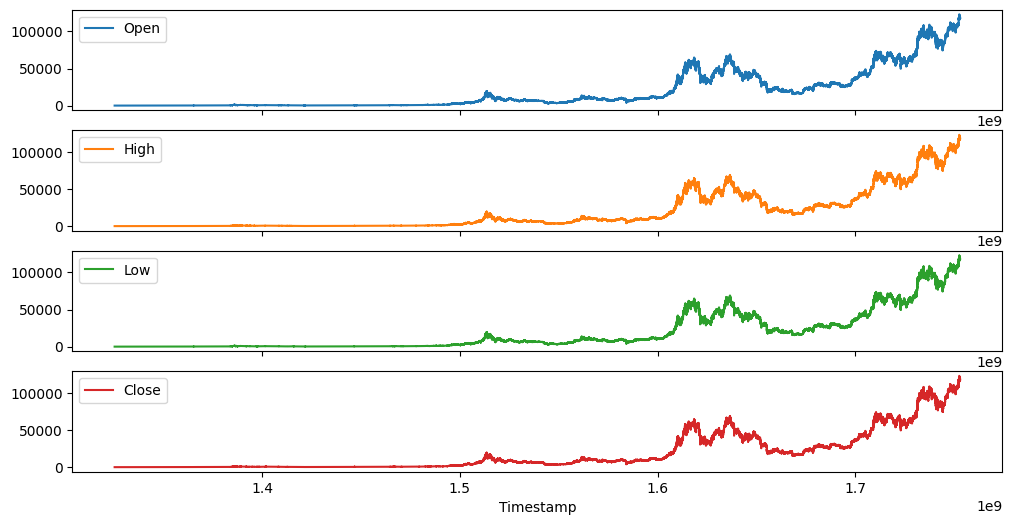

In [4]:
plot_cols = ['Open', 'High', 'Low', 'Close']
plot_features = df[plot_cols]
plot_features.index = df['Timestamp']
_ = plot_features.plot(subplots=True)

In [34]:
df['normalized_timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]
df['normalized_timestamp'] = df['normalized_timestamp'].astype(int)

In [35]:
df['min_sin'] = np.sin(df['normalized_timestamp'] * (2 * np.pi / 300))
df['min_cos'] = np.cos(df['normalized_timestamp'] * (2 * np.pi / 300))

(0.0, 30.0)

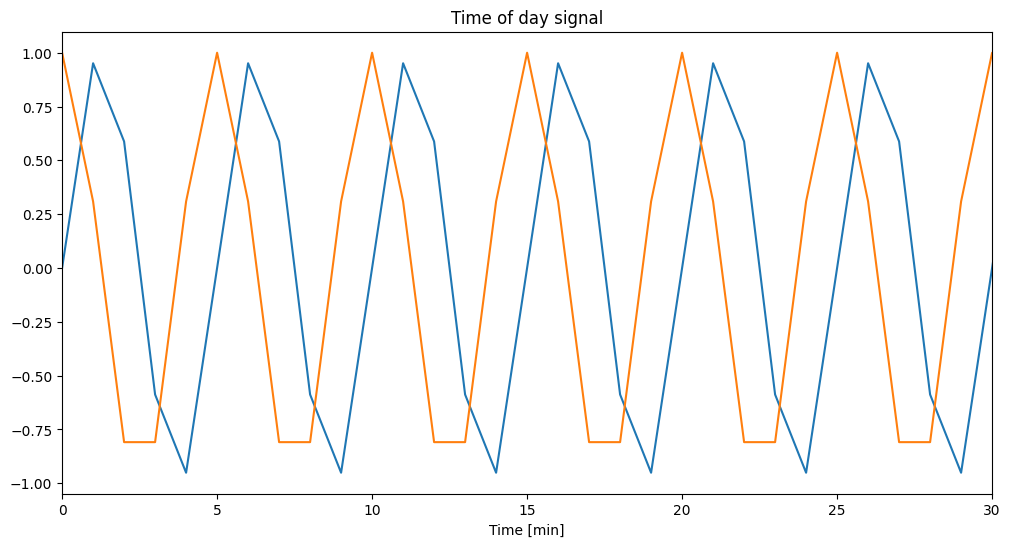

In [27]:
plt.plot(df['normalized_timestamp']/60, df['min_sin'])
plt.plot(df['normalized_timestamp']/60, df['min_cos'])

plt.xlabel('Time [min]')
plt.title('Time of day signal')

plt.xlim([0, 30])

In [40]:
df = df[:60]

In [41]:
fft = tf.signal.rfft(df['Close'])
f_per_dataset = np.arange(0, len(fft))

print(len(fft))


31


In [45]:
n_samples_minutes = len(df['Close'])

print(n_samples_minutes)

minutes_per_year = 24*365.2524*60

seconds_per_year = minutes_per_year * 60 # hours_per_year * seconds_per_hour
seconds_per_5min_cycle = 5 * 60

f_5min_cycle_per_year = seconds_per_year / seconds_per_5min_cycle

years_per_dataset = n_samples/(minutes_per_year)


print(f_5min_cycle_per_year)

60
105192.6912


In [ ]:

f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4000)
plt.xlim([0.1, 1])
plt.xticks([1, 365.2524, f_5min_cycle_per_year], labels=['1year', '1/day', '1/5min'])
plt.grid(True, which="both", ls="-") # Add grid for better readability
_ = plt.xlabel('Frequency (log scale)')

In [113]:
df = df.drop(columns=['Timestamp'])

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [114]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/tmp/ipykernel_783641/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


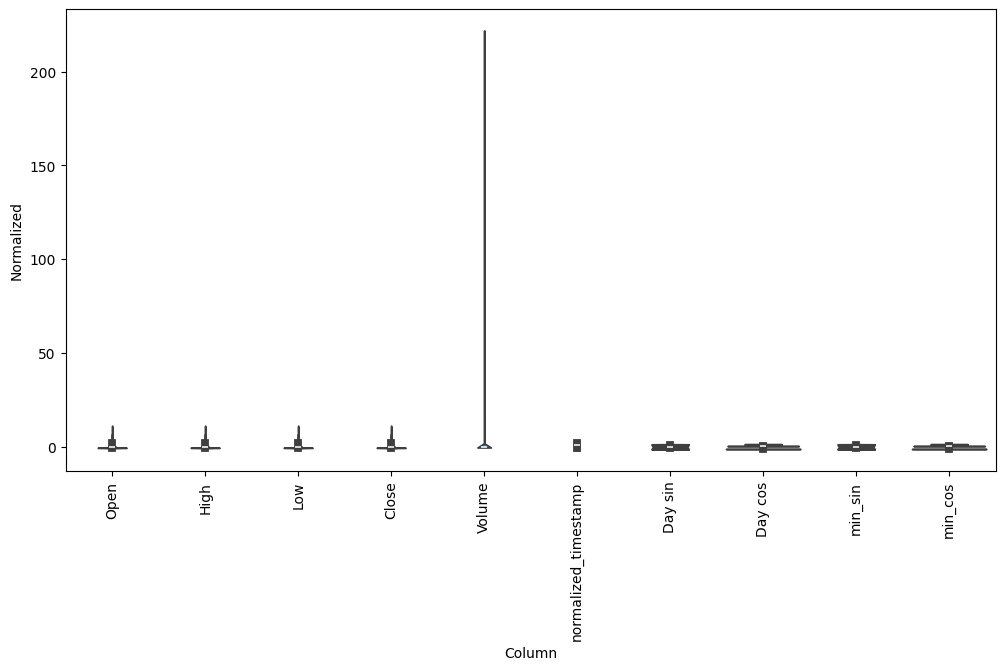

In [117]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)